# Analisis Perbandingan Kualitas Layanan Aplikasi Mobile Banking

In [1]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
data_bni = pd.read_csv("ulasan_bni-mobile-banking.csv")
data_brimo = pd.read_csv("ulasan_brimo.csv")
data_mandiri = pd.read_csv("ulasan_livin-by-mandiri.csv")

In [3]:
kamus_normalisasi = {
    "gak": "tidak", "ga": "tidak", "nggak": "tidak", "tdk": "tidak", "tak": "tidak",
    "udah": "sudah", "udh": "sudah", "blm": "belum", "belom": "belum",
    "aja": "saja", "doang": "saja",
    "bgt": "banget", "bangettt": "banget",
    "yg": "yang", "dgn": "dengan", "krn": "karena",
    "tp": "tapi", "tpi": "tapi",
    "trs": "terus", "trus": "terus",
    "bs": "bisa", "ga bisa": "tidak bisa",
    "sm": "sama", "pdhl": "padahal",
    "dr": "dari", "utk": "untuk",
    "sy": "saya", "aq": "aku", "gw": "saya", "gue": "saya",
    "lg": "lagi", "lgi": "lagi",
    "plis": "tolong", "tolonglah": "tolong"
}

kamus_konteks = {
    "apk": "aplikasi", "apps": "aplikasi", "app": "aplikasi",
    "login": "masuk", "sign in": "masuk", "log in": "masuk",
    "error": "kesalahan", "eror": "kesalahan", "lemot": "lambat",
    "crash": "keluar", "force close": "keluar",
    "otp": "kode otp", "verif": "verifikasi",
    "tf": "transfer", "trf": "transfer",
    "rek": "rekening", "saldo nya": "saldo",
    "update mulu": "sering diperbarui"
}


# *********************
# PREPROCESSING TOOLS
# *********************
stop_words = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def remove_non_ascii(text):
    return text.encode('ascii', 'ignore').decode('ascii')

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_double_char(text):
    return re.sub(r'(.)\1{1,}', r'\1', text)

def normalize_typo_gaul(text):
    words = text.split()
    result = []
    for w in words:
        if w in kamus_normalisasi:
            result.append(kamus_normalisasi[w])
        elif w in kamus_konteks:
            result.append(kamus_konteks[w])
        else:
            result.append(w)
    return ' '.join(result)

def remove_stopwords(text):
    return ' '.join([w for w in text.split() if w not in stop_words])

def remove_short_words(text, min_len=3):
    return ' '.join([w for w in text.split() if len(w) >= min_len])

# ******************************
# FINAL PREPROCESS FUNCTION
# ******************************
def preprocess_text(text):
    text = str(text).lower()
    text = remove_non_ascii(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = remove_double_char(text)
    text = normalize_typo_gaul(text)     # NORMALISASI AWAL
    text = remove_stopwords(text)
    text = remove_short_words(text)
    text = stemmer.stem(text)
    text = remove_double_char(text)      
    return text

# *******************************
# APPLY PREPROCESSING
# *******************************
data_bni ['text_clean'] = data_bni ['content'].apply(preprocess_text)
data_brimo ['text_clean'] = data_brimo ['content'].apply(preprocess_text)
data_mandiri ['text_clean'] = data_mandiri['content'].apply(preprocess_text)

# *******************************
# TAMPILKAN HASIL
# *******************************
pd.set_option('display.max_colwidth', None)

print("=== BNI===")
display(data_bni [['content', 'text_clean']].head(5))

print("=== BRI ===")
display(data_brimo [['content', 'text_clean']].head(5))

print("=== MANDIRI ===")
display(data_mandiri [['content', 'text_clean']].head(5))

=== BNI===


content  \
0                                                                                                                                       apk ga guna masa buat bayar ga bisa tolong dong d perbaiki lagi   
1                                                                                                                                                                                            i love bni   
2                                                                                                                   mobile banking terlalu sering tidak bisa digunakan,tidak bisa melanjutkan transaksi   
3  aplikasi jlk bgt masa setiap bulan harus ganti pasword transaksi lama lama bisa bingung sendiri karena aplikasi sering minta ganti pasword trus gk kaya aplikasi BCA sekali bikin selamanya digunaka   
4                                                                                                                                                                       PERTAHANKAN BNI MOBILE BANGKING   

                                                                                                    text_clean  
0                                                                                   aplikasi bayar tolong baik  
1                                                                                                     love bni  
2                                                               mobile banking digunakantidak lanjut transaksi  
3  aplikasi jlk banget ganti pasword transaksi bingung aplikasi ganti pasword kaya aplikasi bca bikin digunaka  
4                                                                                    tahan bni mobile bangking

=== BRI ===


content  \
0  Dg menggunakan Brimo, aktivitas finansial menjadi mudah. Sudah lama saya tidak menggunakan kartu ATM, karena semuanya mudah dg Brimo..   
1                                                                                                                                 makasih   
2                                                                                                   suka banget dan mudah untuk transaksi   
3                                                                                          bertransaksi dengan brimo pastinya lancar jaya   
4                                                                                                                               excellent   

                                                                    text_clean  
0  mengunakan brimo aktivitas finansial mudah mengunakan kartu atm mudah brimo  
1                                                                      makasih  
2                                                  suka banget mudah transaksi  
3                                            transaksi brimo pasti lancar jaya  
4                                                                     excelent

=== MANDIRI ===


content  \
0                                                  aplikasi g jelas, knp saat transfer via dana selalu eror berkali kali di pencet gbisa   
1  kenapa dipersusah kalo mau transfer ke rekening lain contoh kaya transfer ke DANA susah. isi pulsa isi kuota juga kenapa ada potongan   
2                                                                                                            sangat membantu saat mobile   
3                                                                kurang bagus pemakaian 1 bulan udah update Tf ke bank lain juga lumayan   
4                                                                                              apk nya sangat berguna dan sangat penting   

                                                                                text_clean  
0                          aplikasi knp sat transfer via dana salah kali kali pencet gbisa  
1  susah kalo transfer rekening contoh kaya transfer dana susah isi pulsa isi kuota potong  
2                                                                         bantu sat mobile  
3                                                 bagus pakai update transfer bank lumayan  
4                                                                        aplikasi nya guna

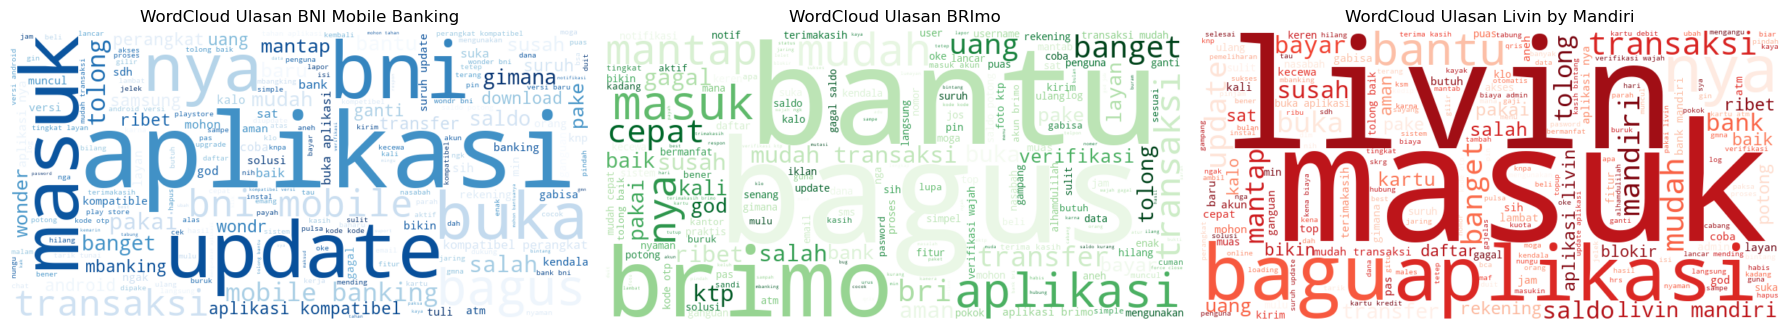

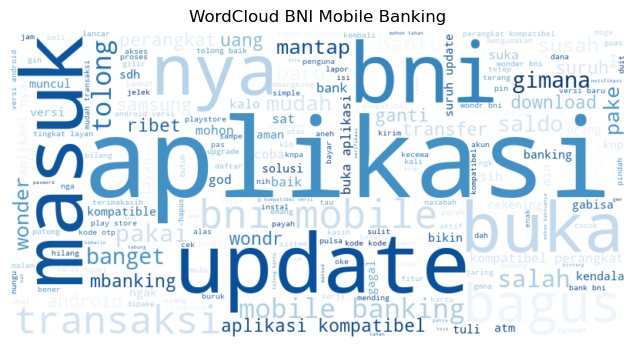

In [4]:
# *******************************
# Gabungkan Teks per Aplikasi
# *******************************
text_bni = ' '.join(data_bni['text_clean'].dropna())
text_brimo = ' '.join(data_brimo['text_clean'].dropna())
text_mandiri = ' '.join(data_mandiri['text_clean'].dropna())


# *******************************
# Buat WordCloud untuk Masing-masing Data
# *******************************
wc_bni = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Blues'
).generate(text_bni)

wc_brimo = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens'
).generate(text_brimo)

wc_mandiri = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds'
).generate(text_mandiri)


# *******************************
# Tampilkan WordCloud Berdampingan
# *******************************
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(wc_bni, interpolation='bilinear')
plt.title('WordCloud Ulasan BNI Mobile Banking')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wc_brimo, interpolation='bilinear')
plt.title('WordCloud Ulasan BRImo')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wc_mandiri, interpolation='bilinear')
plt.title('WordCloud Ulasan Livin by Mandiri')
plt.axis('off')

plt.tight_layout()
plt.show()

# *******************************
#  WordCloud per Aplikasi
# *******************************
plt.figure(figsize=(8,4))
plt.imshow(wc_bni, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud BNI Mobile Banking')
plt.show()

In [5]:
# *******************************
# SIMPAN HASIL PREPROCESSING
# *******************************

# BNI
data_bni.to_csv(
    "Dataset_bni_preprocessing.csv",
    index=False,
    encoding="utf-8-sig"
)

# BRI (BRImo)
data_brimo.to_csv(
    "Dataset_brimo_preprocessing.csv",
    index=False,
    encoding="utf-8-sig"
)

# Mandiri (Livin)
data_mandiri.to_csv(
    "Dataset_livin_mandiri_preprocessing.csv",
    index=False,
    encoding="utf-8-sig"
)

print("Dataset preprocessing berhasil disimpan!")


Dataset preprocessing berhasil disimpan!


In [6]:
# *******************************
# KAMUS LEXICON SENTIMEN
# *******************************

lexicon_positive = {
    "bagus", "baik", "mantap", "cepat", "mudah", "lancar", "stabil",
    "puas", "senang", "suka", "keren", "aman", "nyaman",
    "membantu", "berguna", "praktis", "efisien", "akurat",
    "recommended", "top", "memuaskan", "terbaik", "responsif"
}

lexicon_negative = {
    "buruk", "jelek", "lambat", "lemot", "error", "kesalahan",
    "gagal", "keluar", "crash", "kecewa", "ribet", "susah",
    "tidak bisa", "masalah", "parah", "bug", "hang",
    "login gagal", "verifikasi gagal", "mengecewakan",
    "payah", "tolong", "keluhan"
}


In [7]:
# *******************************
# FUNGSI LABEL SENTIMEN
# *******************************

def sentiment_lexicon(text):
    pos, neg = 0, 0
    for word in text.split():
        if word in lexicon_positive:
            pos += 1
        elif word in lexicon_negative:
            neg += 1

    if pos > neg:
        return "positif"
    elif neg > pos:
        return "negatif"
    else:
        return "netral"


In [8]:
# *******************************
# Sentimen ke Ketiga Dataset
# *******************************
data_bni['sentimen'] = data_bni['text_clean'].apply(sentiment_lexicon)
data_brimo['sentimen'] = data_brimo['text_clean'].apply(sentiment_lexicon)
data_mandiri['sentimen'] = data_mandiri['text_clean'].apply(sentiment_lexicon)


In [9]:
# *******************************
# Cek Distribusi Sentimen
# *******************************

print("Distribusi Sentimen BNI")
print(data_bni['sentimen'].value_counts(), "\n")

print("Distribusi Sentimen BRImo")
print(data_brimo['sentimen'].value_counts(), "\n")

print("Distribusi Sentimen Livin Mandiri")
print(data_mandiri['sentimen'].value_counts())


Distribusi Sentimen BNI
netral     1263
positif     438
negatif     299
Name: sentimen, dtype: int64 

Distribusi Sentimen BRImo
netral     939
positif    845
negatif    216
Name: sentimen, dtype: int64 

Distribusi Sentimen Livin Mandiri
netral     1120
positif     614
negatif     266
Name: sentimen, dtype: int64


In [10]:
# *******************************
# Simpan Dataset dengan Label Sentimen
# *******************************
data_bni.to_csv("bni_sentimen_lexicon.csv", index=False, encoding="utf-8-sig")
data_brimo.to_csv("brimo_sentimen_lexicon.csv", index=False, encoding="utf-8-sig")
data_mandiri.to_csv("mandiri_sentimen_lexicon.csv", index=False, encoding="utf-8-sig")


In [11]:
print("=== Dataset BNI Mobile Banking ===")
display(data_bni[['text_clean', 'sentimen']].head())

print("\n=== Dataset BRImo ===")
display(data_brimo[['text_clean', 'sentimen']].head())

print("\n=== Dataset Livin by Mandiri ===")
display(data_mandiri[['text_clean', 'sentimen']].head())

=== Dataset BNI Mobile Banking ===


text_clean  \
0                                                                                   aplikasi bayar tolong baik   
1                                                                                                     love bni   
2                                                               mobile banking digunakantidak lanjut transaksi   
3  aplikasi jlk banget ganti pasword transaksi bingung aplikasi ganti pasword kaya aplikasi bca bikin digunaka   
4                                                                                    tahan bni mobile bangking   

  sentimen  
0   netral  
1   netral  
2   netral  
3   netral  
4   netral


=== Dataset BRImo ===


text_clean  \
0  mengunakan brimo aktivitas finansial mudah mengunakan kartu atm mudah brimo   
1                                                                      makasih   
2                                                  suka banget mudah transaksi   
3                                            transaksi brimo pasti lancar jaya   
4                                                                     excelent   

  sentimen  
0  positif  
1   netral  
2  positif  
3  positif  
4   netral


=== Dataset Livin by Mandiri ===


text_clean  \
0                          aplikasi knp sat transfer via dana salah kali kali pencet gbisa   
1  susah kalo transfer rekening contoh kaya transfer dana susah isi pulsa isi kuota potong   
2                                                                         bantu sat mobile   
3                                                 bagus pakai update transfer bank lumayan   
4                                                                        aplikasi nya guna   

  sentimen  
0   netral  
1  negatif  
2   netral  
3  positif  
4   netral

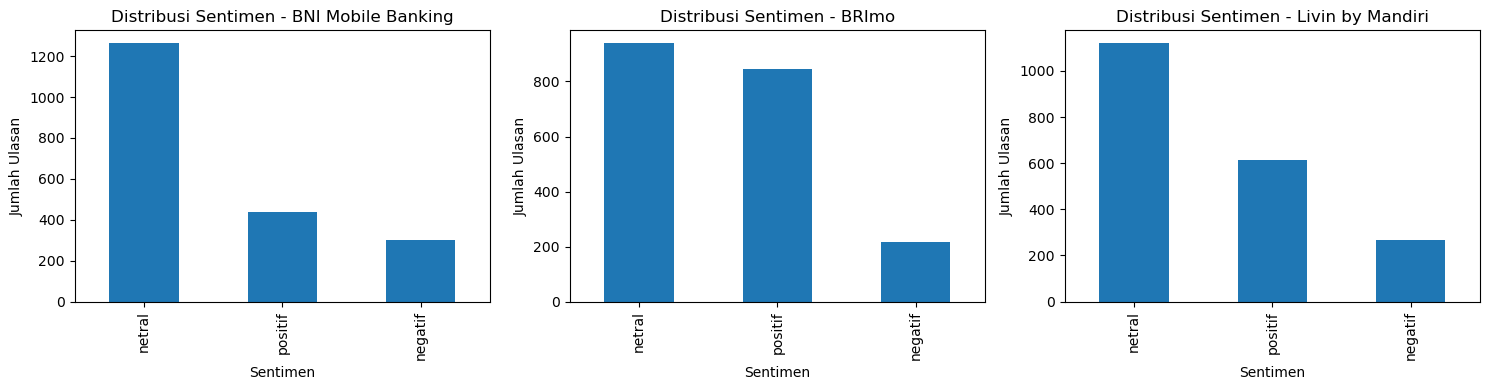

In [12]:
import matplotlib.pyplot as plt

#*******************************
# VISUALISASI
# *******************************
plt.figure(figsize=(15, 4))

for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(1, 3, i)
    df['sentimen'].value_counts().plot(kind='bar')
    plt.title(f"Distribusi Sentimen - {name}")
    plt.xlabel("Sentimen")
    plt.ylabel("Jumlah Ulasan")

plt.tight_layout()
plt.show()


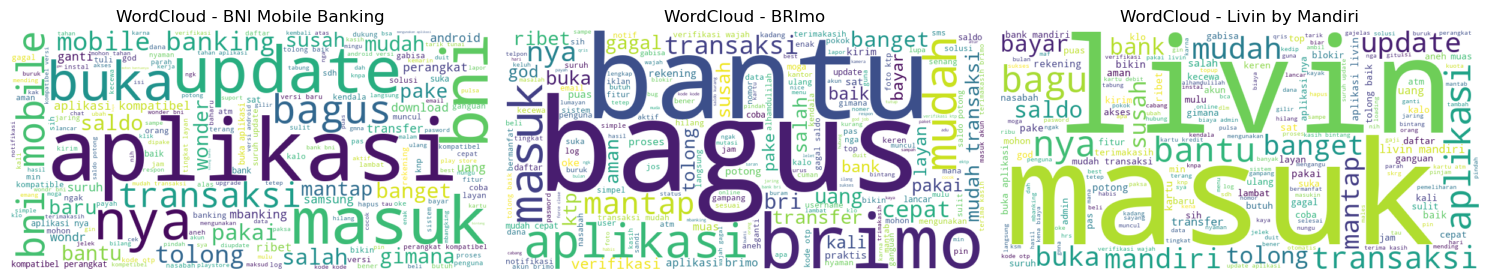

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#  *******************************
# WORDCLOUD
#  *******************************
plt.figure(figsize=(15, 5))

for i, (name, df) in enumerate(datasets.items(), 1):
    text = " ".join(df['text_clean'].dropna())
    
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(text)
    
    plt.subplot(1, 3, i)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud - {name}")

plt.tight_layout()
plt.show()


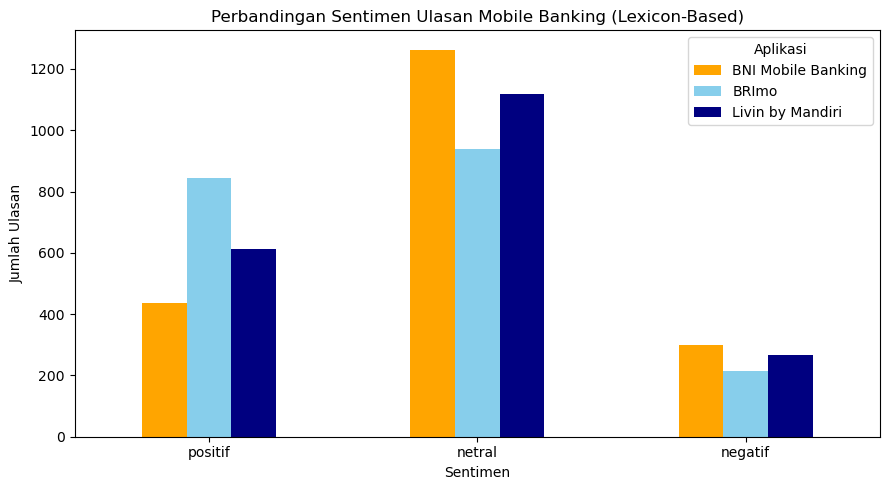

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# *******************************
# HITUNG DISTRIBUSI SENTIMEN
# *******************************
bni_count = data_bni['sentimen'].value_counts()
brimo_count = data_brimo['sentimen'].value_counts()
mandiri_count = data_mandiri['sentimen'].value_counts()

# *******************************
# GABUNGKAN KE DATAFRAME
# *******************************
compare_df = pd.DataFrame({
    'BNI Mobile Banking': bni_count,
    'BRImo': brimo_count,
    'Livin by Mandiri': mandiri_count
}).fillna(0)

# URUTKAN SENTIMEN AGAR KONSISTEN
compare_df = compare_df.reindex(['positif', 'netral', 'negatif'])

# *******************************
# PLOT PERBANDINGAN
# *******************************
compare_df.plot(
    kind='bar',
    figsize=(9, 5),
    color=['orange', 'skyblue', 'navy']
)

plt.title("Perbandingan Sentimen Ulasan Mobile Banking (Lexicon-Based)")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.xticks(rotation=0)
plt.legend(title="Aplikasi")
plt.tight_layout()
plt.show()



WordCloud Dataset: BNI Mobile Banking


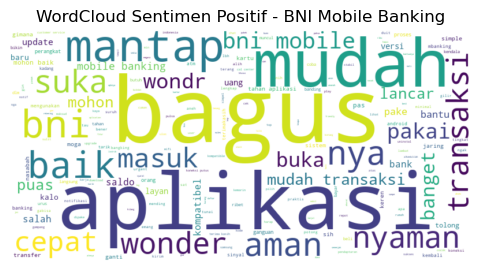

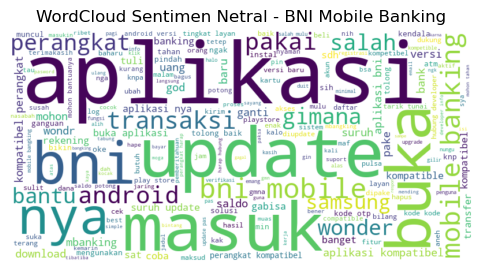

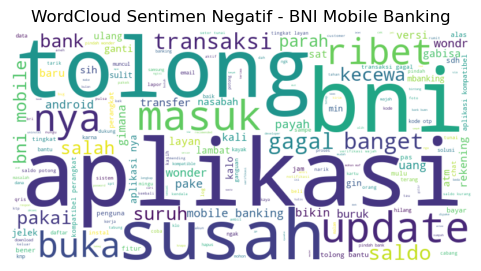


WordCloud Dataset: BRImo


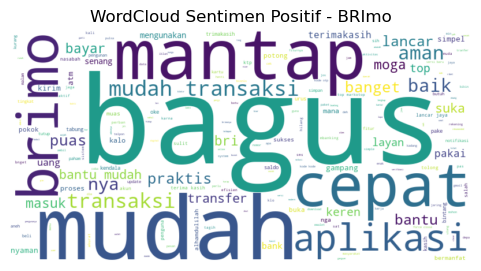

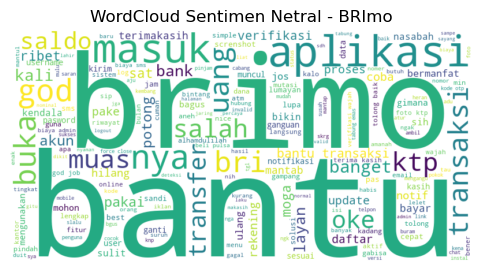

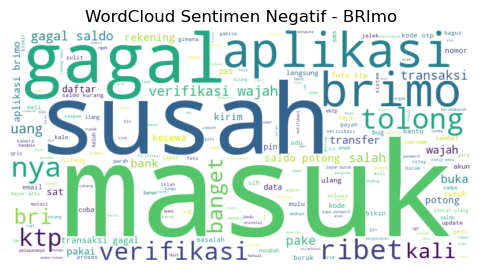


WordCloud Dataset: Livin by Mandiri


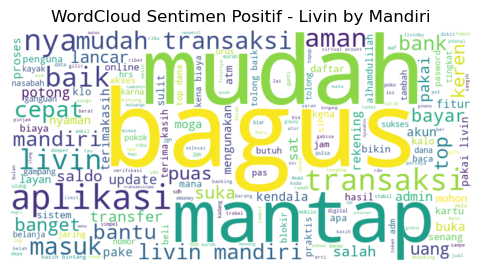

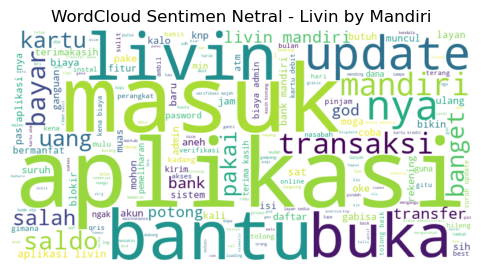

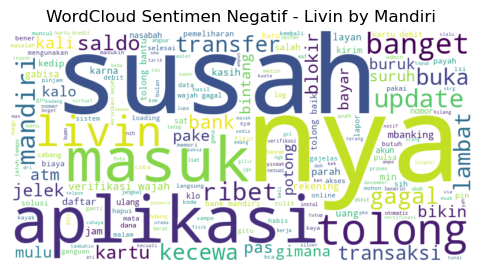

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# *******************************
# DAFTAR SENTIMEN
# *******************************
sentiments = ["positif", "netral", "negatif"]

# *******************************
# WORDCLOUD PER SENTIMEN
# *******************************
for dataset_name, df in datasets.items():
    print(f"\nWordCloud Dataset: {dataset_name}")
    
    for sent in sentiments:
        text_data = " ".join(
            df[df["sentimen"] == sent]["text_clean"].dropna().astype(str)
        )
        
        # Jika tidak ada teks, lewati
        if text_data.strip() == "":
            continue
        
        wc = WordCloud(
            width=800,
            height=400,
            background_color="white"
        ).generate(text_data)

        plt.figure(figsize=(6, 3))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"WordCloud Sentimen {sent.capitalize()} - {dataset_name}")
        plt.show()


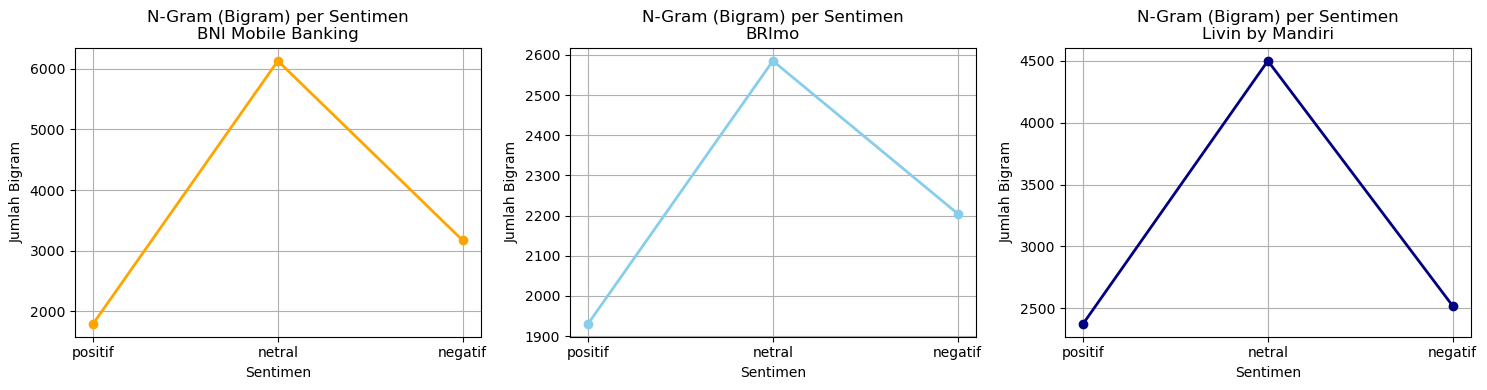

In [22]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# *******************************
# DATASET
# *******************************
datasets = {
    "BNI Mobile Banking": data_bni,
    "BRImo": data_brimo,
    "Livin by Mandiri": data_mandiri
}

sentiments = ["positif", "netral", "negatif"]

# WARNA GARIS SETIAP DATASET
colors = {
    "BNI Mobile Banking": "orange",
    "BRImo": "skyblue",
    "Livin by Mandiri": "navy"
}

# *******************************
# VISUALISASI N-GRAM (BIGRAM)
# *******************************
plt.figure(figsize=(15, 4))

for i, (name, df) in enumerate(datasets.items(), 1):
    bigram_counts = {}

    for sent in sentiments:
        texts = df[df["sentimen"] == sent]["text_clean"].dropna().astype(str)

        if texts.empty:
            bigram_counts[sent] = 0
        else:
            vectorizer = CountVectorizer(ngram_range=(2, 2))
            X = vectorizer.fit_transform(texts)
            bigram_counts[sent] = X.sum()

    # Ubah ke Series agar urutan sentimen konsisten
    series_bigram = pd.Series(bigram_counts).reindex(sentiments)

    plt.subplot(1, 3, i)
    plt.plot(
        series_bigram.index,
        series_bigram.values,
        marker='o',
        color=colors[name],
        linewidth=2
    )
    plt.title(f"N-Gram (Bigram) per Sentimen\n{name}")
    plt.xlabel("Sentimen")
    plt.ylabel("Jumlah Bigram")
    plt.grid(True)

plt.tight_layout()
plt.show()


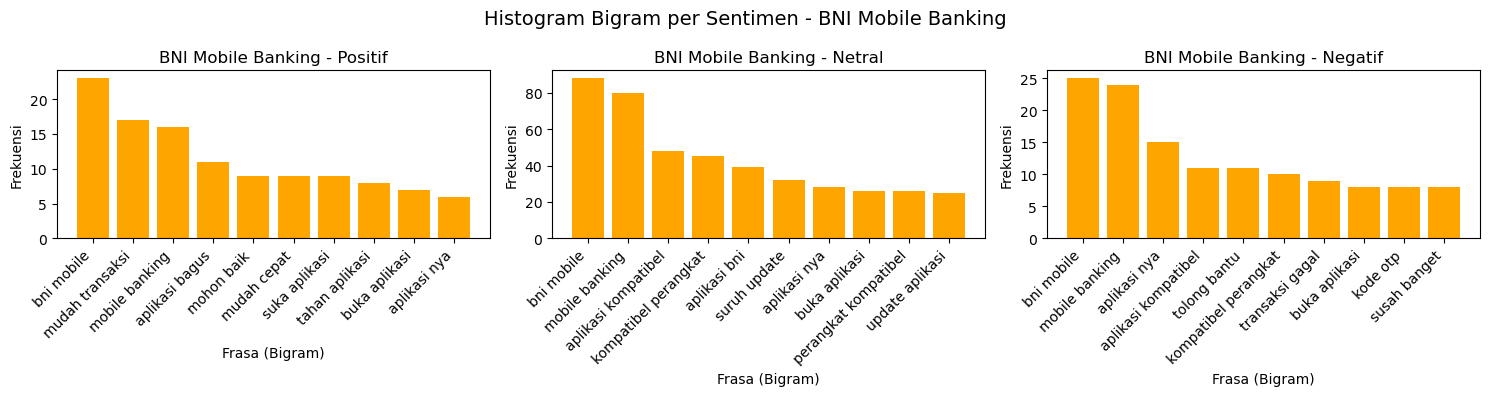

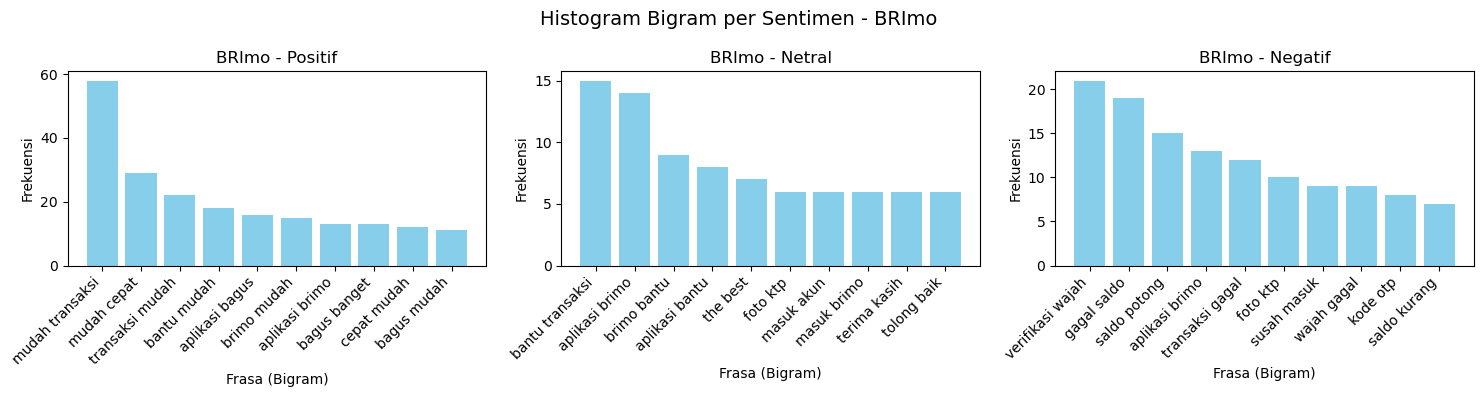

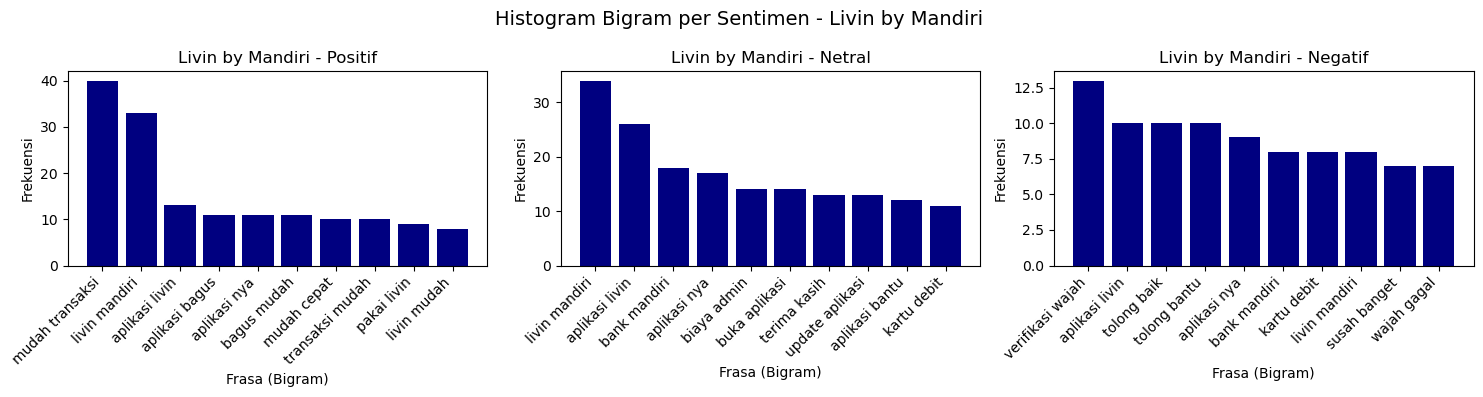

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# *******************************
# DATASET
# *******************************
datasets = {
    "BNI Mobile Banking": data_bni,
    "BRImo": data_brimo,
    "Livin by Mandiri": data_mandiri
}

sentiments = ["positif", "netral", "negatif"]

# WARNA SETIAP DATASET
colors = {
    "BNI Mobile Banking": "orange",
    "BRImo": "skyblue",
    "Livin by Mandiri": "navy"
}

# *******************************
# HISTOGRAM BIGRAM
# *******************************
for dataset_name, df in datasets.items():
    plt.figure(figsize=(15, 4))
    
    for i, sent in enumerate(sentiments, 1):
        texts = df[df["sentimen"] == sent]["text_clean"].dropna().astype(str)

        if texts.empty:
            continue

        vectorizer = CountVectorizer(
            ngram_range=(2, 2),
            max_features=10
        )
        X = vectorizer.fit_transform(texts)

        bigram_freq = X.sum(axis=0).A1
        bigram_names = vectorizer.get_feature_names_out()

        bigram_df = pd.DataFrame({
            "Bigram": bigram_names,
            "Frekuensi": bigram_freq
        }).sort_values(by="Frekuensi", ascending=False)

        plt.subplot(1, 3, i)
        plt.bar(
            bigram_df["Bigram"],
            bigram_df["Frekuensi"],
            color=colors[dataset_name]
        )
        plt.xticks(rotation=45, ha="right")
        plt.title(f"{dataset_name} - {sent.capitalize()}")
        plt.xlabel("Frasa (Bigram)")
        plt.ylabel("Frekuensi")

    plt.suptitle(
        f"Histogram Bigram per Sentimen - {dataset_name}",
        fontsize=14
    )
    plt.tight_layout()
    plt.show()


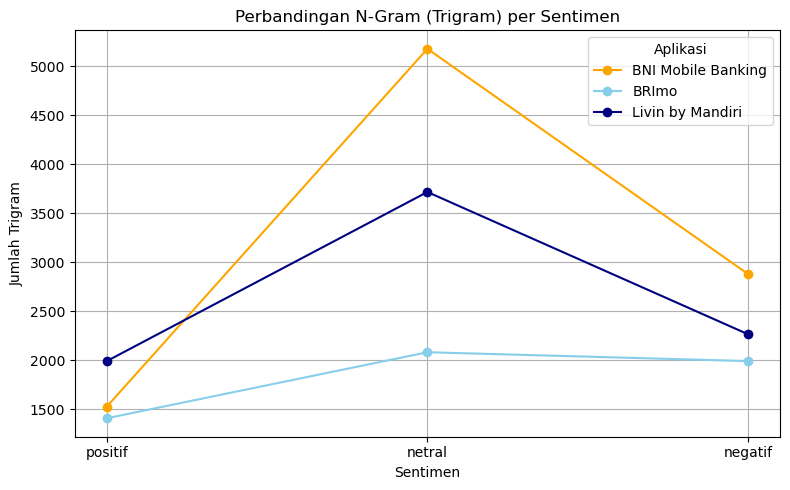

In [21]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# ===============================
# DATASET
# ===============================
datasets = {
    "BNI Mobile Banking": data_bni,
    "BRImo": data_brimo,
    "Livin by Mandiri": data_mandiri
}

# Warna sesuai permintaan
colors = {
    "BNI Mobile Banking": "orange",
    "BRImo": "skyblue",
    "Livin by Mandiri": "navy"
}

sentiments = ["positif", "netral", "negatif"]

# ===============================
# HITUNG TRIGRAM PER SENTIMEN
# ===============================
trigram_result = {}

for name, df in datasets.items():
    trigram_counts = []

    for sent in sentiments:
        texts = df[df["sentimen"] == sent]["text_clean"].dropna().astype(str)

        if texts.empty:
            trigram_counts.append(0)
        else:
            vectorizer = CountVectorizer(ngram_range=(3, 3))
            X = vectorizer.fit_transform(texts)
            trigram_counts.append(X.sum())

    trigram_result[name] = trigram_counts

# ===============================
# VISUALISASI GRAFIK GARIS
# ===============================
plt.figure(figsize=(8, 5))

for name, values in trigram_result.items():
    plt.plot(
        sentiments,
        values,
        marker='o',
        label=name,
        color=colors[name]
    )

plt.title("Perbandingan N-Gram (Trigram) per Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Trigram")
plt.legend(title="Aplikasi")
plt.grid(True)
plt.tight_layout()
plt.show()


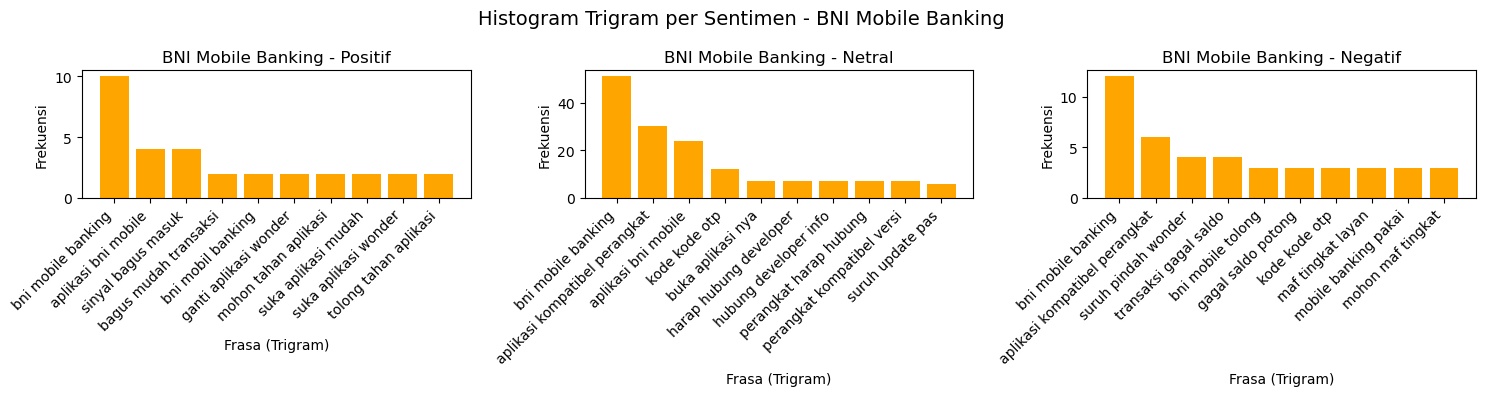

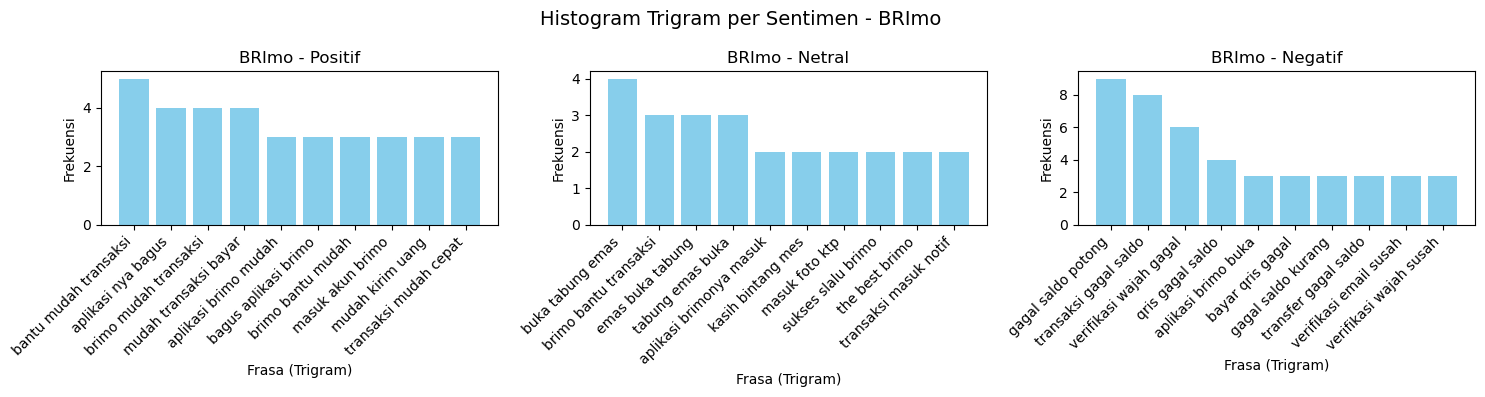

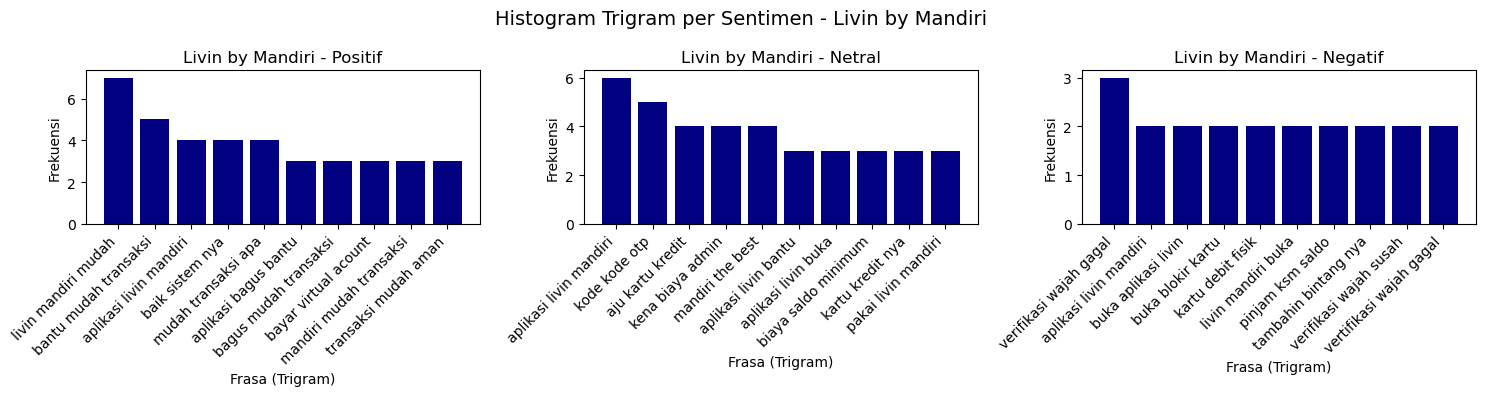

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# *******************************
# DATASET
# *******************************
datasets = {
    "BNI Mobile Banking": data_bni,
    "BRImo": data_brimo,
    "Livin by Mandiri": data_mandiri
}

sentiments = ["positif", "netral", "negatif"]

# WARNA SETIAP DATASET
colors = {
    "BNI Mobile Banking": "orange",
    "BRImo": "skyblue",
    "Livin by Mandiri": "navy"
}

# *******************************
# HISTOGRAM TRIGRAM
# *******************************
for dataset_name, df in datasets.items():
    plt.figure(figsize=(15, 4))
    
    for i, sent in enumerate(sentiments, 1):
        texts = df[df["sentimen"] == sent]["text_clean"].dropna().astype(str)

        if texts.empty:
            continue

        vectorizer = CountVectorizer(
            ngram_range=(3, 3),   # 🔹 TRIGRAM
            max_features=10
        )
        X = vectorizer.fit_transform(texts)

        trigram_freq = X.sum(axis=0).A1
        trigram_names = vectorizer.get_feature_names_out()

        trigram_df = pd.DataFrame({
            "Trigram": trigram_names,
            "Frekuensi": trigram_freq
        }).sort_values(by="Frekuensi", ascending=False)

        plt.subplot(1, 3, i)
        plt.bar(
            trigram_df["Trigram"],
            trigram_df["Frekuensi"],
            color=colors[dataset_name]
        )
        plt.xticks(rotation=45, ha="right")
        plt.title(f"{dataset_name} - {sent.capitalize()}")
        plt.xlabel("Frasa (Trigram)")
        plt.ylabel("Frekuensi")

    plt.suptitle(
        f"Histogram Trigram per Sentimen - {dataset_name}",
        fontsize=14
    )
    plt.tight_layout()
    plt.show()
